## Charging and Discharging of a Capacitor
###### By Brandon Weiss
#### 27 October 2020

Images showing a circuit diagram of the circuit I used and a closeup of the breadboard. When charging the capacitor, the current passes through the battery. When discharging the capacitor, the battery is taken out of the circuit (current will pass through the dashed lines).

<img src="CapCirc.jpg">

<img src="CapBoard.jpg">

Images showing the charging and discharging of a 0.1 mF capacitor.

<img src="CapChar.jpg">

<img src="CapDis.jpg">

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Used https://apps.automeris.io/wpd/ to get data points

In [2]:
# Load data
charged = np.loadtxt('ChargeCap.csv', delimiter=',')
discharged = np.loadtxt('DisCap.csv', delimiter=',')
xCharge = charged[:,0]
yCharge = charged[:,1]
xDis = discharged[:,0]
yDis = discharged[:,1]

In [3]:
# define fit function for charging a capacitor
def fitC(x, A, B):
    return A*(1 - np.exp(-x/B))

In [4]:
# define fit function for discharging a capacitor
def fitD(x, A, B):
    return A * np.exp(-x/B)

In [5]:
# Run the charging fit to get parameters and uncertainties
guess = (6, 0.5)
fitparams, covars = curve_fit(fitC, xCharge, yCharge, p0=guess)
print("Parameters: " + str(fitparams))
print([covars[i,i] for i in range(len(covars))])

Parameters: [6.09352529 0.51019522]
[8.160455499141304e-05, 7.299433831883858e-06]


The equation of best fit for the charging data points is of the form $$\hat{y} = A(1 - e^{\frac{-x}{B}})$$ where A is $6.09353 \pm 0.00008$ and B is $0.510195 \pm 0.000007$.

In [6]:
# Run the discharging fit to get parameters and uncertainties
guess = (6, 90)
fitparams2, covars2 = curve_fit(fitD, xDis, yDis, p0=guess)
print("Parameters: " + str(fitparams2))
print([covars2[i,i] for i in range(len(covars2))])

Parameters: [ 6.51708071 94.17620633]
[0.00014086446385516094, 0.06518144557092585]


The equation of best fit for the discharging data points is of the form $$\hat{y} = Ae^{\frac{-x}{B}}$$ where A is $6.5171 \pm 0.0001$ and B is $94.18 \pm 0.07$.

In [7]:
# Calculate the residuals for the charging fit
def calcResC(x, y, fit):
    res = np.subtract([fit[0] * (1 - np.exp(-z/fit[1])) for z in x], y)
    return res
resC = calcResC(xCharge, yCharge, fitparams)
np.std(resC)

0.03149676797751015

In [8]:
# Calculate the residuals for the discharging fit
def calcResD(x, y, fit):
    res = np.subtract([fit[0] * np.exp(-z/fit[1]) for z in x], y)
    return res
resD = calcResD(xDis, yDis, fitparams2)
np.std(resD)

0.017075419012170037

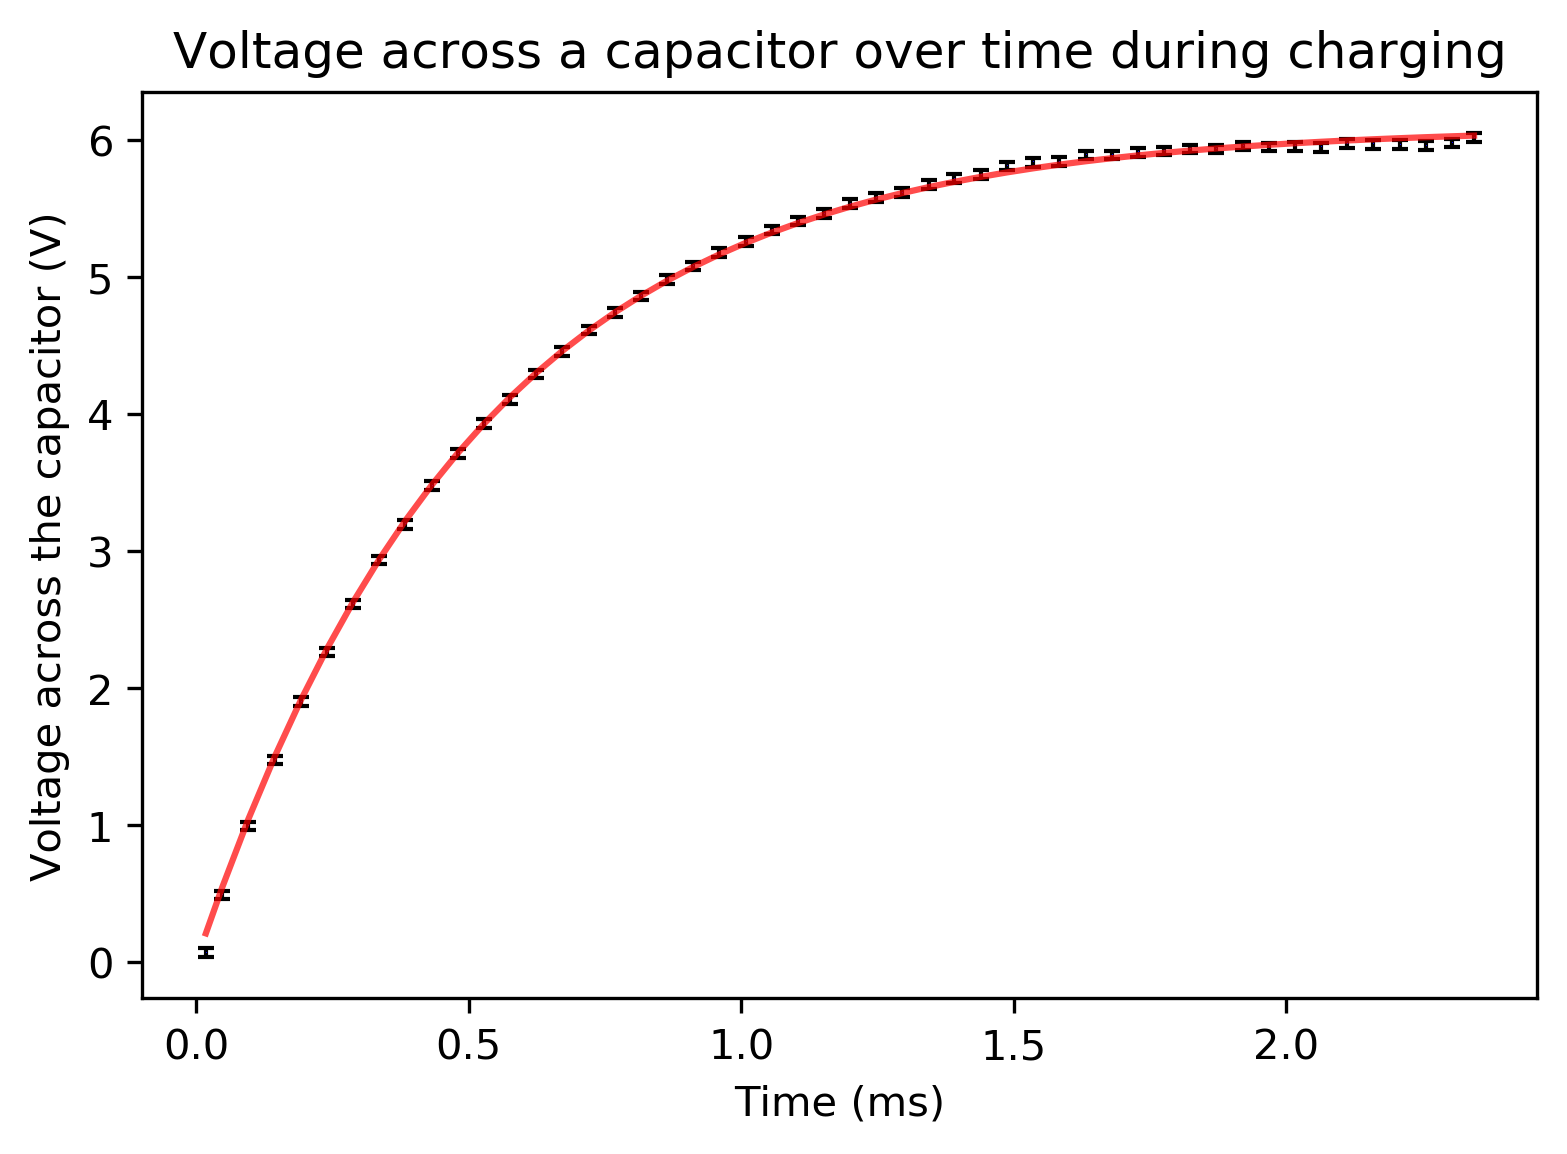

In [9]:
# Plot the charging data points with the fit function and error bars (sqrt(residuals))
plt.figure(dpi=300)
plt.title("Voltage across a capacitor over time during charging")
plt.ylabel("Voltage across the capacitor (V)")
plt.xlabel("Time (ms)")
plt.plot(xCharge, yCharge, 'b,')
plt.errorbar(xCharge, yCharge, np.std(resC), ls='none', color='black', capsize=2, elinewidth=1)
plt.plot(xCharge, [fitparams[0] * (1 - np.exp(-z/fitparams[1])) for z in xCharge], "r-", alpha=0.7)

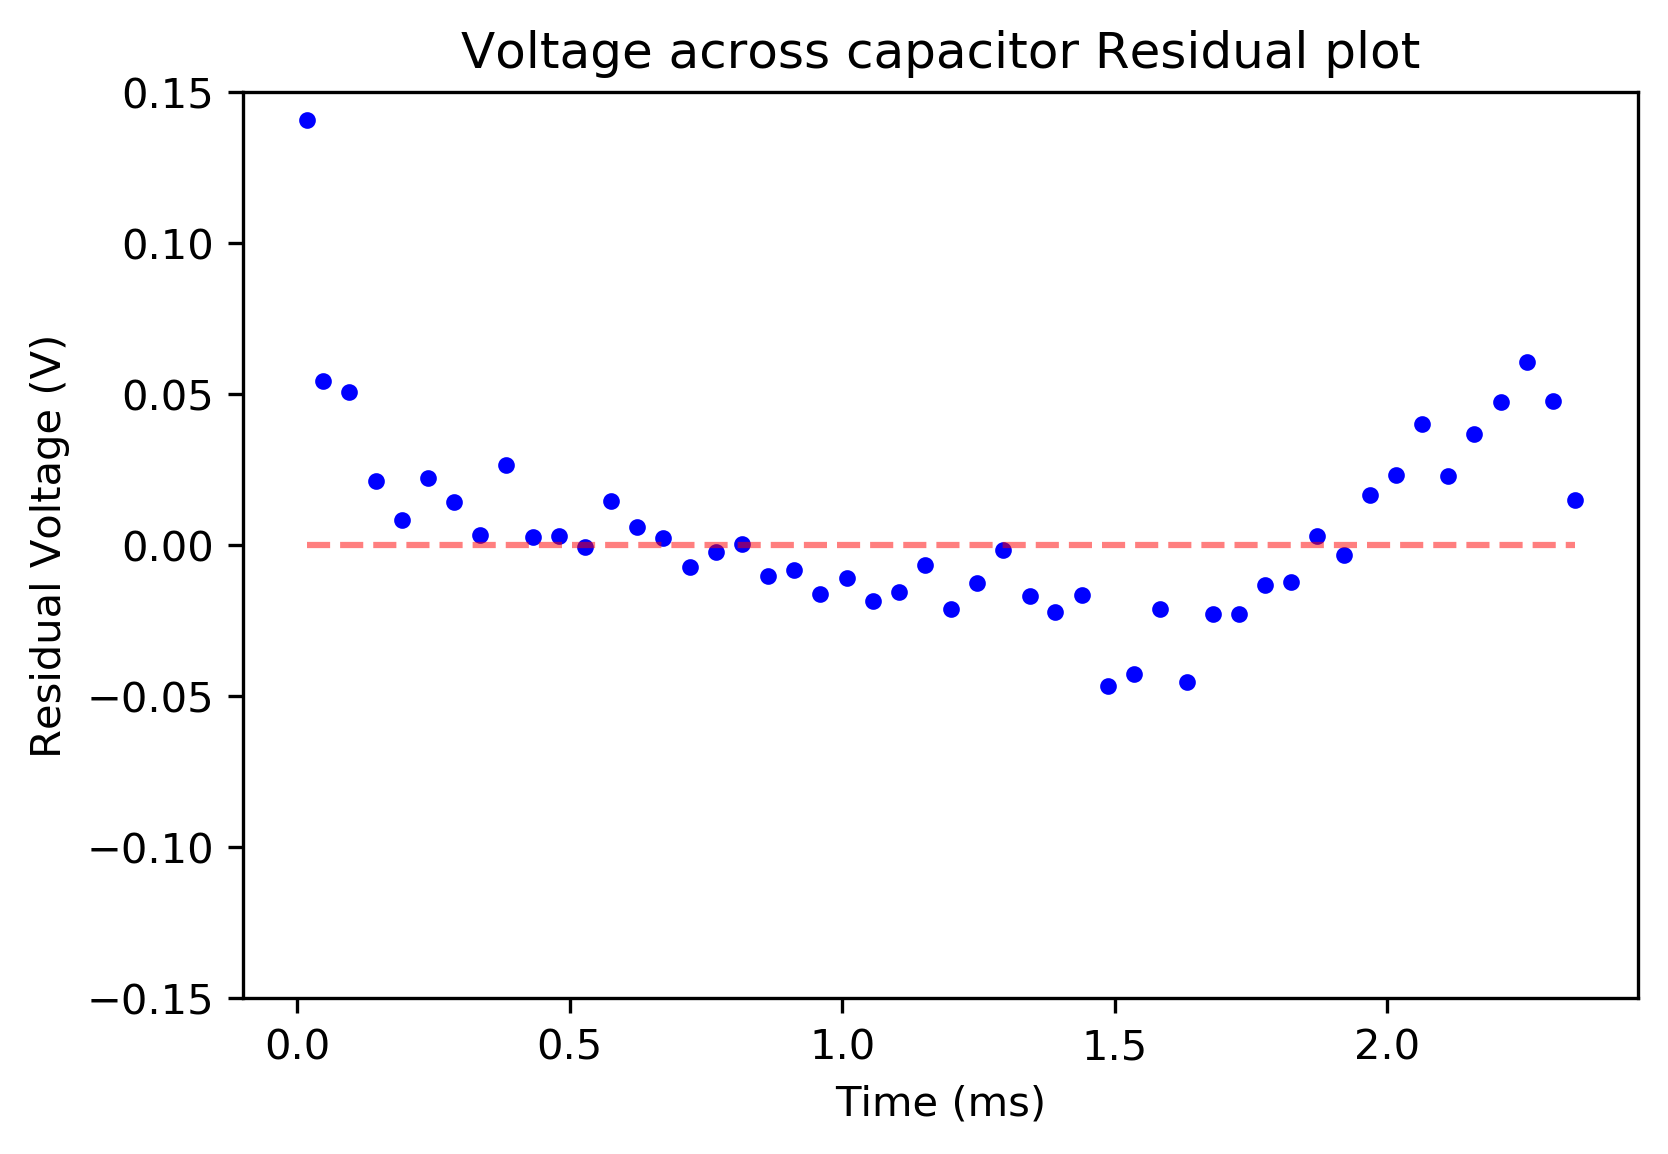

In [10]:
# Plotting the residual of all the data points for charging
plt.figure(dpi=300)
plt.ylim(ymin=-0.15, ymax=0.15)
plt.title('Voltage across capacitor Residual plot')
plt.ylabel('Residual Voltage (V)')
plt.xlabel('Time (ms)')
plt.plot(xCharge, resC, "b.")
plt.plot(xCharge, np.zeros(len(xCharge)), "r--", alpha=0.5)

In [11]:
# Calculate the Chi-square for charging
summ = np.array([])
std = np.std(resC)
for i in range(len(resC)):
    summ = np.append(summ, resC[i]**2 / std**2)
Chi = np.sum(summ)
print(Chi, Chi/(len(xCharge)-len(fitparams)))

51.45044180266918 1.0718842042222747


Since the reduced $\chi^2$ of the charging fit is 1.07 which is very close to 1, this exponential function is a very good fit for the data presented.

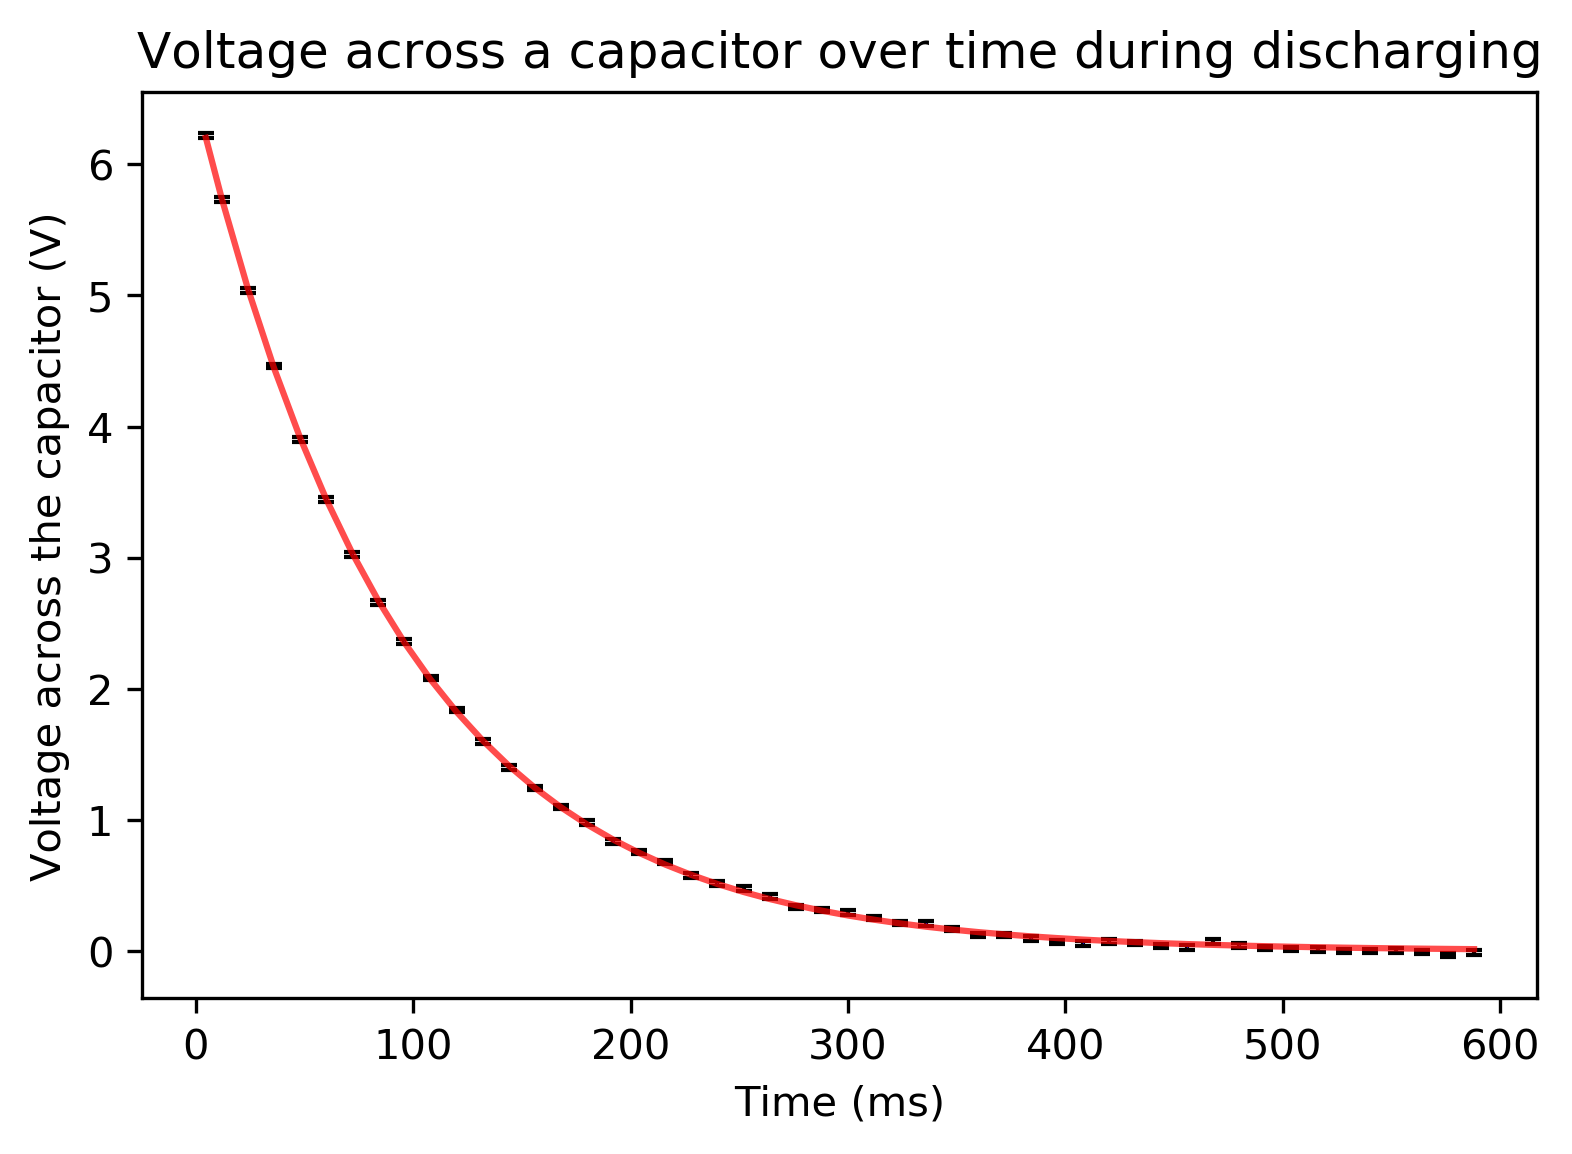

In [12]:
# Plot the discharging data points with the fit function and error bars (sqrt(residuals))
plt.figure(dpi=300)
plt.title("Voltage across a capacitor over time during discharging")
plt.ylabel("Voltage across the capacitor (V)")
plt.xlabel("Time (ms)")
plt.plot(xDis, yDis, 'b,')
plt.errorbar(xDis, yDis, np.std(resD), ls='none', color='black', capsize=2, elinewidth=1)
plt.plot(xDis, [fitparams2[0] * np.exp(-z/fitparams2[1]) for z in xDis], "r-", alpha=0.7)

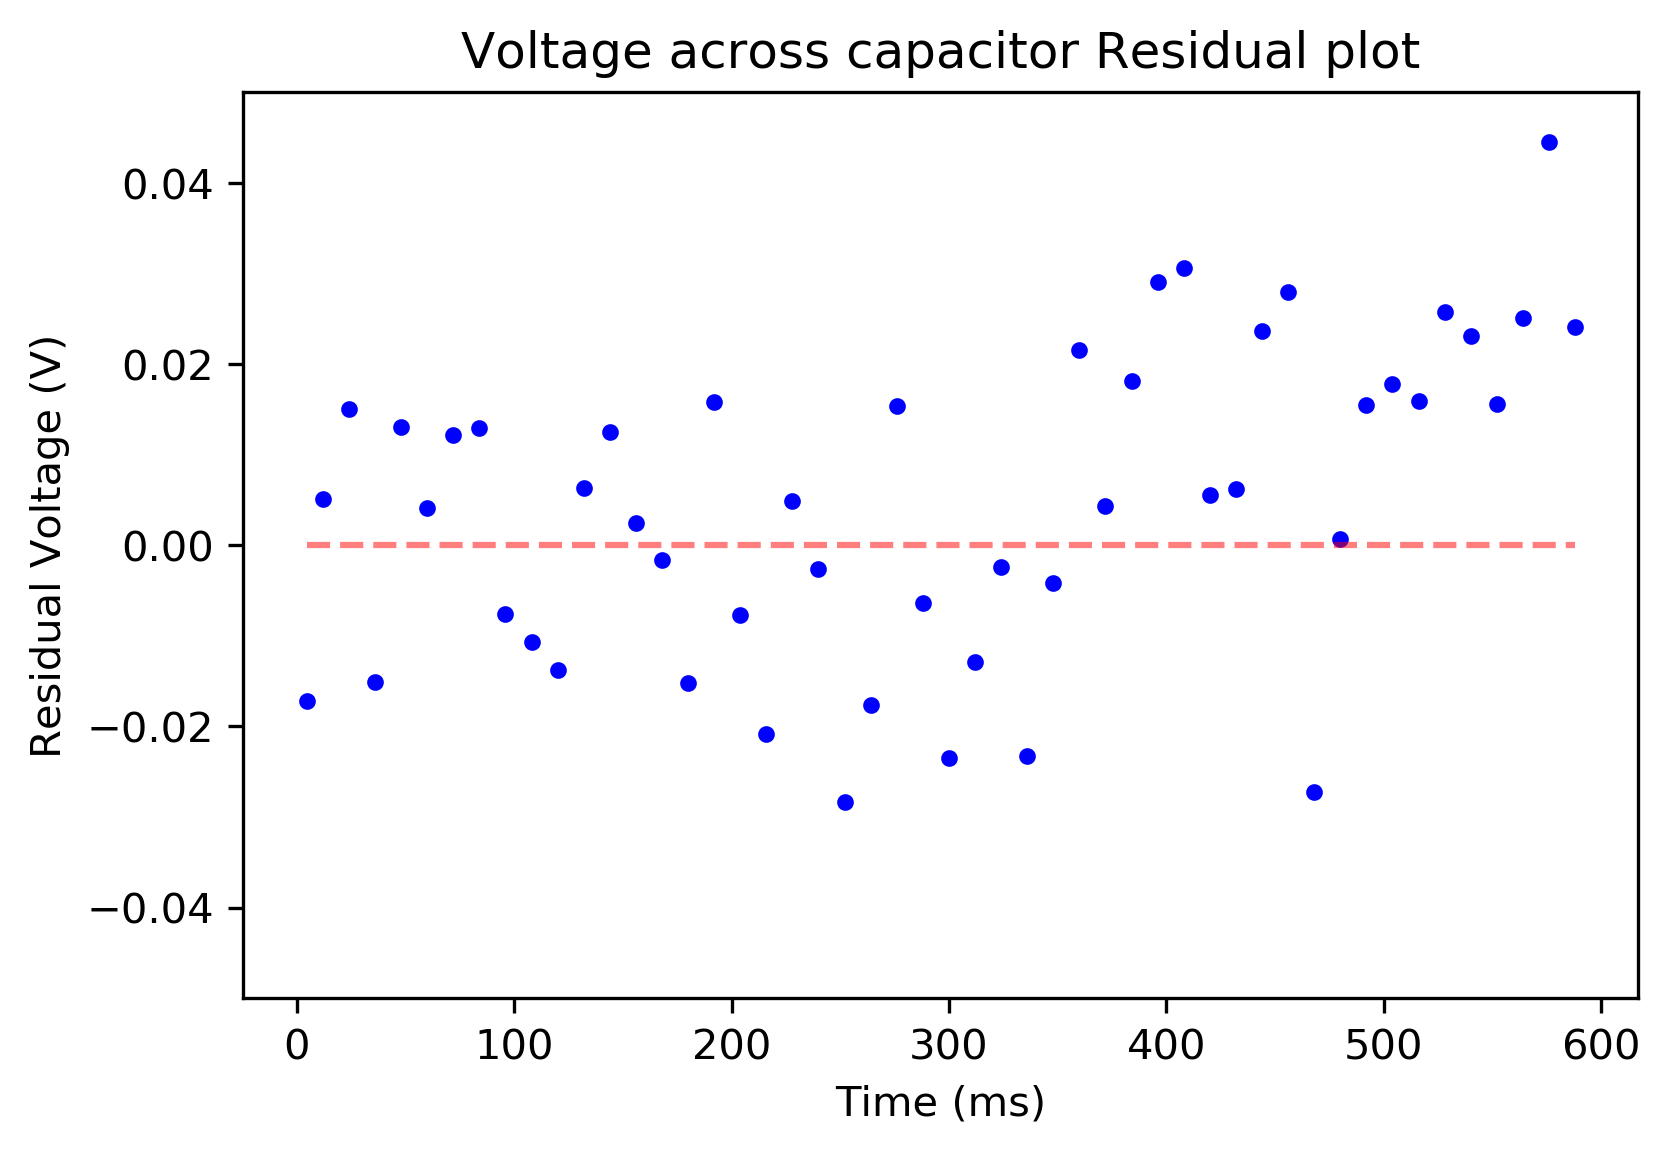

In [13]:
# Plotting the residual of all the data points for discharging
plt.figure(dpi=300)
plt.ylim(ymin=-0.05, ymax=0.05)
plt.title('Voltage across capacitor Residual plot')
plt.ylabel('Residual Voltage (V)')
plt.xlabel('Time (ms)')
plt.plot(xDis, resD, "b.")
plt.plot(xDis, np.zeros(len(xDis)), "r--", alpha=0.5)

In [14]:
# Calculate the Chi-square for discharging
summ2 = np.array([])
std = np.std(resD)
for i in range(len(resD)):
    summ2 = np.append(summ2, resD[i]**2 / std**2)
ChiD = np.sum(summ2)
print(ChiD, ChiD/(len(xDis)-len(fitparams2)))

53.83920262806934 1.1216500547514445


Since the reduced $\chi^2$ of the discharging fit is 1.12 which is very close to 1, this exponential function is a very good fit for the data presented.

In the equations above ($\hat{y} = A(1 - e^{\frac{-x}{B}})$ and $\hat{y} = Ae^{\frac{-x}{B}}$), the A represents the maximum voltage across the capacitor, and the B represents the time constant $\tau = RC$. Since we know the capacitor has capacitance 0.1 mF, we can get the resistance from the circuit $R = \frac{\tau}{C}$.

In [15]:
#Calculate the resistance for charging and discharging
resisC = fitparams[1] / 0.1
resisD = fitparams2[1] / 0.1
print("Resistance in the charging circuit: ", resisC, " kΩ")
print("Resistance in the discharging circuit: ", resisD, " kΩ")

Resistance in the charging circuit:  5.101952182753913  kΩ
Resistance in the discharging circuit:  941.762063335874  kΩ


### Discussion section
**Uncertainties in the charging data:** The equation of best fit for the charging data points is of the form $\hat{y} = A(1 - e^{\frac{-x}{B}})$ where A is $6.09353 \pm 0.00008$ and B is $0.510195 \pm 0.000007$. The uncertainties in the fit parameters were found by taking the diagonals of the covariance matrix calculated when running scipy.optimize.curve_fit(). Using the equation of best fit, the uncertainties of dependent variable of the charging data were calculated by taking the standard deviation of the residuals of each data point. The uncertainty of the dependent variable of the charging data was found to be $\pm 0.03$ V.

**Goodness of fit in the charging data:** The fit function found for the charging data seems to be a good fit. When analyzing the plot of the residuals, they seem to be skewed by the first point, but then randomly scattered. After conducting a Chi-Square analysis on the data, a reduced Chi-Square statistic of 1.07 was found, indicating a good fit since this value is very close to 1.

**Uncertainties in the discharging data:** The equation of best fit for the discharging data points is of the form $\hat{y} = Ae^{\frac{-x}{B}}$ where A is $6.5171 \pm 0.0001$ and B is $94.18 \pm 0.07$. The uncertainties in the fit parameters were found by taking the diagonals of the covariance matrix calculated when running scipy.optimize.curve_fit(). Using the equation of best fit, the uncertainties of dependent variable of the discharging data were calculated by taking the standard deviation of the residuals of each data point. The uncertainty of the dependent variable of the discharging data was found to be $\pm 0.01$ V.

**Goodness of fit in the discharging data:** The fit function found for the discharging data seems to be a good fit. When analyzing the plot of the residuals, they seem to be randomly scattered, indicating random noise. After conducting a Chi-Square analysis on the data, a reduced Chi-Square statistic of 1.12 was found, indicating a good fit since this value is very close to 1.

**Possible sources of error in this experiment** include the following:
1. Parallax when taking pictures of the oscilloscope skewing the data values.
2. Discharging method was too slow, so the capacitor might have discharged through the oscilloscope, not when the two ends of the wires touched. This could lead to a differing time constant τ and resistance R.
3. Precision of marking the proper axis when gathering data from the wpd webapp.